In [4]:
import pandas as pd
import geopandas as gpd
import contextily as cx

In [2]:
df = gpd.read_parquet(
    "s3://weave.energy/smart-meter", 
    filters=[("data_collection_log_timestamp", "==", pd.Timestamp("2024-07-14T20:00:00Z"))])

print("Number of rows: ", len(df))
df.head()


Number of rows:  89358


,dataset_id,dno_alias,aggregated_device_count_active,total_consumption_active_import,data_collection_log_timestamp,geometry,secondary_substation_unique_id,lv_feeder_unique_id
0,NGED_110191_11_Jul_2024,NGED,26.0,7693.0,2024-07-14 20:00:00+00:00,POINT (-2.5715 51.4262),NGED-110191,NGED-110191-11
1,NGED_110191_21_Jul_2024,NGED,28.0,4135.0,2024-07-14 20:00:00+00:00,POINT (-2.5715 51.4262),NGED-110191,NGED-110191-21
2,NGED_110191_22_Jul_2024,NGED,11.0,1920.0,2024-07-14 20:00:00+00:00,POINT (-2.5715 51.4262),NGED-110191,NGED-110191-22
3,NGED_110191_31_Jul_2024,NGED,23.0,4547.0,2024-07-14 20:00:00+00:00,POINT (-2.5715 51.4262),NGED-110191,NGED-110191-31
4,NGED_110191_42_Jul_2024,NGED,24.0,3412.0,2024-07-14 20:00:00+00:00,POINT (-2.5715 51.4262),NGED-110191,NGED-110191-42


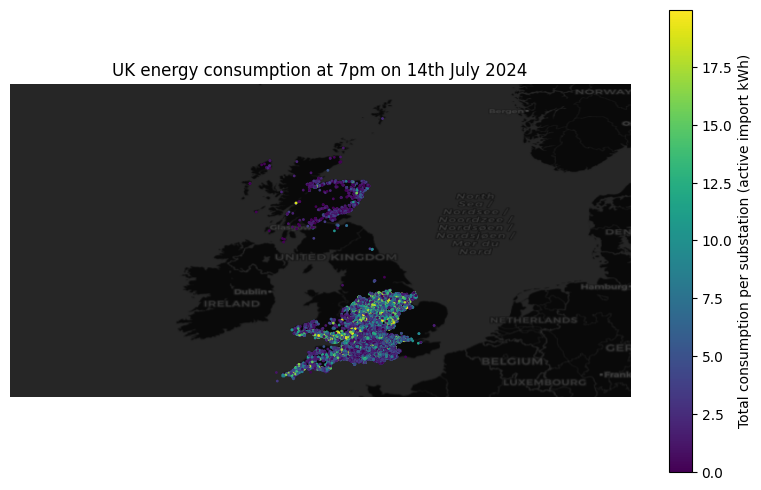

In [3]:
substations = df.groupby(["secondary_substation_unique_id", "geometry"], as_index=False).sum("total_consumption_active_import").set_geometry("geometry")
# There are still issues with extreme outliers, so we filter them out
substations = substations[substations["total_consumption_active_import"] < 20000]

# Turn Wh consumption into kWh
substations["total_consumption_active_import"] /= 1000


ax = substations.plot(kind="geo", column="total_consumption_active_import", markersize=1, legend=True, legend_kwds={"label": "Total consumption per substation (active import kWh)"}, figsize=(10, 6))
ax.set_title("UK energy consumption at 7pm on 14th July 2024")
ax.set_axis_off()
ax.set_xlim(-18, 10)
ax.set_ylim(49.25, 61.5)
cx.add_basemap(ax, crs=4326, source=cx.providers.CartoDB.DarkMatter, attribution=False)


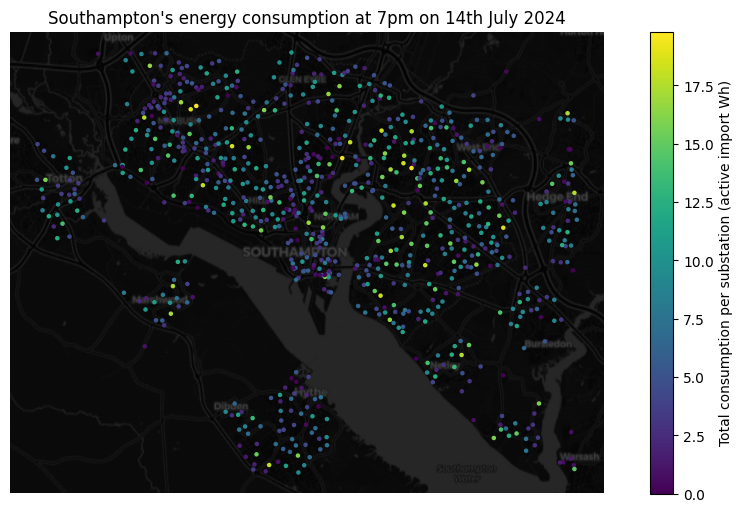

In [4]:
bbox = (-1.5,50.85,-1.3,50.95)
gdf = gpd.read_parquet("s3://weave.energy/smart-meter", bbox=bbox, filters=[("data_collection_log_timestamp", "=", pd.Timestamp("2024-07-14 20:00Z"))])
substations = gdf.groupby(["secondary_substation_unique_id", "geometry"], as_index=False).sum("total_consumption_active_import").set_geometry("geometry", crs=4326)
substations = substations[substations["total_consumption_active_import"] < 20000]
# Turn Wh consumption into kWh
substations["total_consumption_active_import"] /= 1000
ax = substations.plot(kind="geo", column="total_consumption_active_import", markersize=5, legend=True, legend_kwds={"label": "Total consumption per substation (active import Wh)"}, figsize=(12, 6))
ax.set_title("Southampton's energy consumption at 7pm on 14th July 2024")
ax.set_axis_off()
ax.set_facecolor("#1B2526")
cx.add_basemap(ax, crs=4326, source=cx.providers.CartoDB.DarkMatter, attribution=False)

In [5]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

### Reading from Local Downloaded Parquet File

In [1]:
import dask.dataframe as dd

df = dd.read_parquet("/Users/vaibhavsourirajan/Documents/COLUMBIA/Senior/WattCast/2024-12.parquet")
print(df.head())

                dataset_id dno_alias  aggregated_device_count_active  \
0  NGED_110139_11_Dec_2024      NGED                            18.0   
1  NGED_110139_12_Dec_2024      NGED                             8.0   
2  NGED_110139_21_Dec_2024      NGED                            17.0   
3  NGED_110139_23_Dec_2024      NGED                             8.0   
4  NGED_110139_25_Dec_2024      NGED                            31.0   

   total_consumption_active_import data_collection_log_timestamp  \
0                           2107.0     2024-12-01 00:00:00+00:00   
1                           1113.0     2024-12-01 00:00:00+00:00   
2                           2471.0     2024-12-01 00:00:00+00:00   
3                            575.0     2024-12-01 00:00:00+00:00   
4                           3881.0     2024-12-01 00:00:00+00:00   

                       geometry secondary_substation_unique_id  \
0  {'x': -2.5999, 'y': 51.4924}                    NGED-110139   
1  {'x': -2.5999, 'y': 51.

### Load in Only Data from December in London

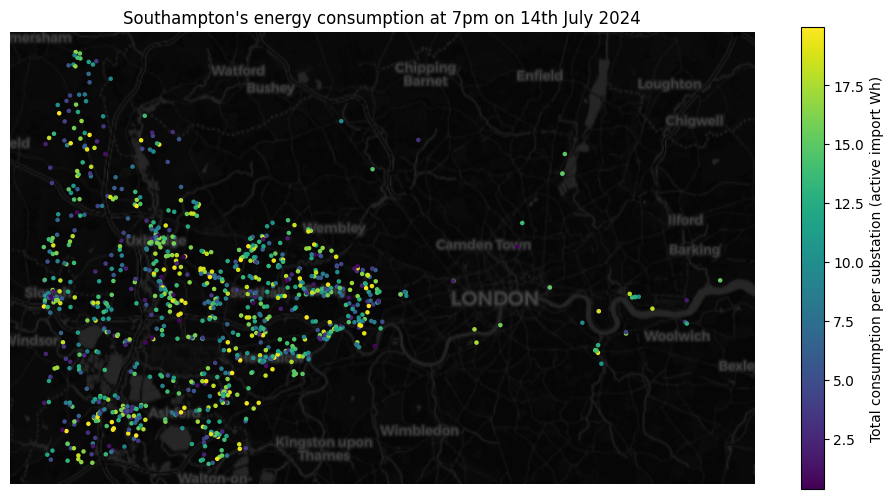

In [ ]:
london_bbox = (-0.6, 51.4, 0.4, 51.7)
london_df_for_visualization = london_df = gpd.read_parquet("/Users/vaibhavsourirajan/Documents/COLUMBIA/Senior/WattCast/2024-12.parquet", 
                                                          bbox=london_bbox,
                                                          filters=[("data_collection_log_timestamp", "=", pd.Timestamp("2024-12-14 20:00Z"))])

substations = london_df_for_visualization.groupby(["secondary_substation_unique_id", "geometry"], as_index=False).sum("total_consumption_active_import").set_geometry("geometry", crs=4326)
substations = substations[substations["total_consumption_active_import"] < 20000]
# Turn Wh consumption into kWh
substations["total_consumption_active_import"] /= 1000
ax = substations.plot(kind="geo", column="total_consumption_active_import", markersize=5, legend=True, legend_kwds={"label": "Total consumption per substation (active import Wh)"}, figsize=(12, 6))
ax.set_title("London's energy consumption at 7pm on 14th July 2024")
ax.set_axis_off()
ax.set_facecolor("#1B2526")
cx.add_basemap(ax, crs=4326, source=cx.providers.CartoDB.DarkMatter, attribution=False)
